# Final Project - ASL Classifier

In [2]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


In [3]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = './data/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int16)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


In [4]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


In [5]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


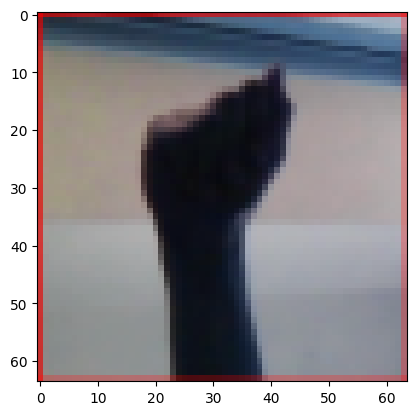

In [6]:
plt.imshow(X_train[0])
plt.show()

In [7]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [9]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [10]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


## Make the model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


In [12]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

c:\Users\lucas.DESKTOP-05T3JIU.001\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,637 (1.36 MB)

 Trainable params: 356,637 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

## Model Fitting

EarlyStopping has the model fitting stop at best accuracy, so we don't miss the best fit. Overfitting could be a problem though, not necessary more for optimization(runs in less time).

In [25]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test))
        #  callbacks=[early_stop])

Epoch 1/50
952/952 - 36s - 38ms/step - accuracy: 0.9882 - loss: 0.0396 - val_accuracy: 0.9869 - val_loss: 0.0478
Epoch 2/50
952/952 - 34s - 35ms/step - accuracy: 0.9913 - loss: 0.0293 - val_accuracy: 0.9941 - val_loss: 0.0201
Epoch 3/50
952/952 - 34s - 36ms/step - accuracy: 0.9923 - loss: 0.0271 - val_accuracy: 0.9897 - val_loss: 0.0316
Epoch 4/50
952/952 - 34s - 35ms/step - accuracy: 0.9935 - loss: 0.0220 - val_accuracy: 0.9839 - val_loss: 0.0639
Epoch 5/50
952/952 - 33s - 35ms/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.9951 - val_loss: 0.0167
Epoch 6/50
952/952 - 33s - 35ms/step - accuracy: 0.9938 - loss: 0.0227 - val_accuracy: 0.9928 - val_loss: 0.0255
Epoch 7/50
952/952 - 33s - 35ms/step - accuracy: 0.9953 - loss: 0.0156 - val_accuracy: 0.9818 - val_loss: 0.0585
Epoch 8/50
952/952 - 33s - 35ms/step - accuracy: 0.9965 - loss: 0.0119 - val_accuracy: 0.9966 - val_loss: 0.0110
Epoch 9/50
952/952 - 34s - 35ms/step - accuracy: 0.9950 - loss: 0.0188 - val_accuracy: 0.9981 - 

## Model Results

In [28]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,accuracy,loss,val_accuracy,val_loss
0,0.988161,3.961730e-02,0.986858,0.047769
1,0.991264,2.931692e-02,0.994138,0.020125
2,0.992266,2.709884e-02,0.989693,0.031623
3,0.993547,2.196879e-02,0.983908,0.063947
4,0.994548,1.864608e-02,0.995057,0.016675
5,0.993842,2.268262e-02,0.992797,0.025458
6,0.995320,1.559050e-02,0.981762,0.058536
7,0.996519,1.192843e-02,0.996552,0.010986
8,0.994959,1.881115e-02,0.998123,0.006240
9,0.996585,1.150730e-02,0.997739,0.009014


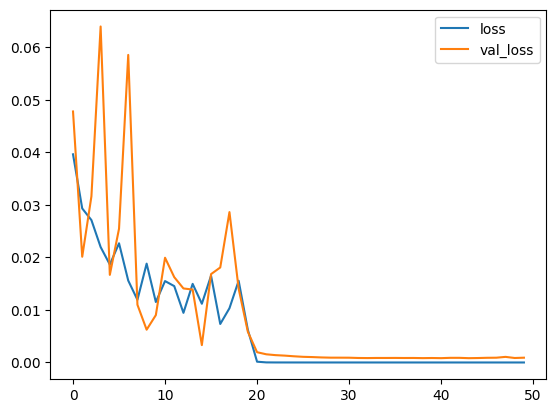

In [29]:
metrics[['loss','val_loss']].plot()
plt.savefig('loss')
plt.show()

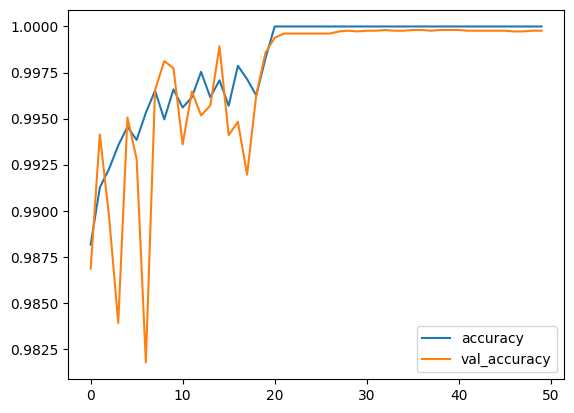

In [30]:
metrics[['accuracy','val_accuracy']].plot()
plt.savefig('accuracy')
plt.show()

In [31]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.0009105674107559025, 0.9997701048851013]

## Model Testing

In [32]:
predictions = model.predict(X_test)
pClasses = np.argmax(predictions, axis=1)
print("Predictions done...")

816/816 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Predictions done...


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pClasses))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900
           2       1.00      1.00      1.00       900
           3       1.00      1.00      1.00       900
           4       1.00      1.00      1.00       900
           5       1.00      1.00      1.00       900
           6       1.00      1.00      1.00       900
           7       1.00      1.00      1.00       900
           8       1.00      1.00      1.00       900
           9       1.00      1.00      1.00       900
          10       1.00      1.00      1.00       900
          11       1.00      1.00      1.00       900
          12       1.00      1.00      1.00       900
          13       1.00      1.00      1.00       900
          14       1.00      1.00      1.00       900
          15       1.00      1.00      1.00       900
          16       1.00      1.00      1.00       900
          17       1.00    

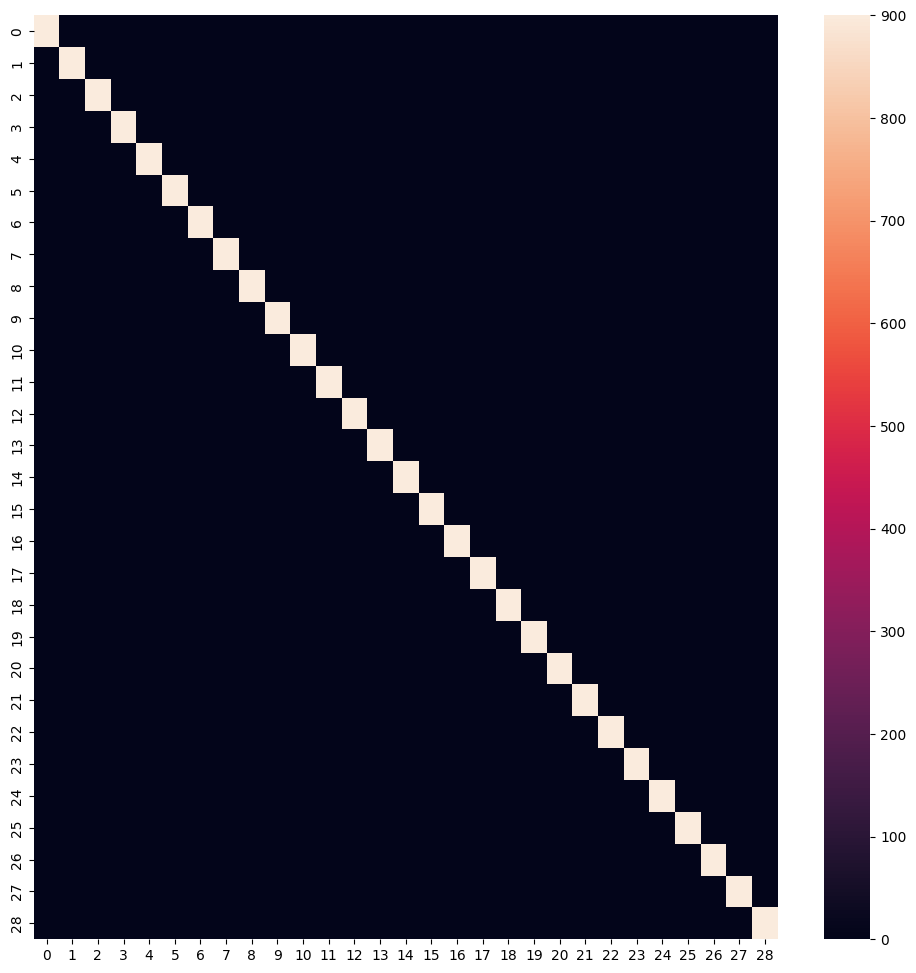

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,pClasses))
plt.show()

In [35]:
from keras.models import load_model
model.save('ASL.keras')
print("Model saved successfully...")

Model saved successfully...
